# Gemini API を Google の generativeai ライブラリを使って試す

まだ Google の generativeai ライブラリを使ったことがなかったので、使ってみたいと思います。

今回は非常にシンプルなコードで試した結果を共有できればと思います。

より高度なことをやりたい方は、公式で出されている Cookbook もあり、他にも沢山の使い方事例が載っており非常に有用です。

- https://ai.google.dev/gemini-api/cookbook


## セットアップ

まずはライブラリをインストールします。


In [1]:
!pip install -Uqq google-generativeai

次に、環境変数に Gemini API キーを設定する必要があります。

私の場合は `~/.zshrc` に環境変数を追加しています。

    ```
    export GEMINI_API_KEY="YOUR_API_KEY"
    ```


In [2]:
import os

import google.generativeai as genai

# genai.configure(api_key=gemini_api_key)
genai.configure(api_key=os.environ["GEMINI_API_KEY"])

print(genai.__version__)

0.6.0


/Users/alexishida/miniforge3/envs/py312/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


これで生成の準備が整いました。


## シンプルな生成を試す

まずは [Quick start](https://ai.google.dev/gemini-api/docs/quickstart?lang=python) に従って、シンプルな生成を試してみます。


In [3]:
import google.generativeai as genai

genai.configure(api_key=os.environ["GEMINI_API_KEY"])
# The Gemini 1.5 models are versatile and work with both text-only and multimodal prompts
model = genai.GenerativeModel("gemini-1.5-flash")

response = model.generate_content("Write a story about a magic backpack.")
print(response.text)

The old, leather backpack felt heavy in Elara's hand. It had belonged to her grandmother, a woman known for her adventurous spirit and an uncanny knack for finding the most unusual trinkets. Elara had never been much for adventure, preferring the quiet comforts of her bookstore, but the backpack called to her. She felt a strange pull, an inexplicable urge to carry it with her.

So, she took it on her daily walk to the park, a routine she followed religiously after closing the bookstore. As she sat on her usual bench, the backpack seemed to sigh, a soft, almost human sound. Elara, startled, opened it. Inside, she found a dusty, leather-bound book. Its pages were filled with strange symbols, a language she couldn't decipher. But as she touched the book, a warm tingling sensation spread through her.

That night, as Elara dreamt, the book came to life. Its symbols danced before her eyes, revealing fantastical landscapes, talking animals, and a world beyond her wildest imagination. When she

返ってきた response の中身を見てみます。


In [5]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "The old, leather backpack felt heavy in Elara's hand. It had belonged to her grandmother, a woman known for her adventurous spirit and an uncanny knack for finding the most unusual trinkets. Elara had never been much for adventure, preferring the quiet comforts of her bookstore, but the backpack called to her. She felt a strange pull, an inexplicable urge to carry it with her.\n\nSo, she took it on her daily walk to the park, a routine she followed religiously after closing the bookstore. As she sat on her usual bench, the backpack seemed to sigh, a soft, almost human sound. Elara, startled, opened it. Inside, she found a dusty, leather-bound book. Its pages were filled with strange symbols, a language she couldn't decipher. But as she touched the book, a wa

In [4]:
type(response)

google.generativeai.types.generation_types.GenerateContentResponse

In [6]:
response.__dict__

{'_done': True,
 '_iterator': None,
 '_result': candidates {
   index: 0
   content {
     parts {
       text: "The old, leather backpack felt heavy in Elara\'s hand. It had belonged to her grandmother, a woman known for her adventurous spirit and an uncanny knack for finding the most unusual trinkets. Elara had never been much for adventure, preferring the quiet comforts of her bookstore, but the backpack called to her. She felt a strange pull, an inexplicable urge to carry it with her.\n\nSo, she took it on her daily walk to the park, a routine she followed religiously after closing the bookstore. As she sat on her usual bench, the backpack seemed to sigh, a soft, almost human sound. Elara, startled, opened it. Inside, she found a dusty, leather-bound book. Its pages were filled with strange symbols, a language she couldn\'t decipher. But as she touched the book, a warm tingling sensation spread through her.\n\nThat night, as Elara dreamt, the book came to life. Its symbols danced b

In [7]:
response.candidates

[index: 0
content {
  parts {
    text: "The old, leather backpack felt heavy in Elara\'s hand. It had belonged to her grandmother, a woman known for her adventurous spirit and an uncanny knack for finding the most unusual trinkets. Elara had never been much for adventure, preferring the quiet comforts of her bookstore, but the backpack called to her. She felt a strange pull, an inexplicable urge to carry it with her.\n\nSo, she took it on her daily walk to the park, a routine she followed religiously after closing the bookstore. As she sat on her usual bench, the backpack seemed to sigh, a soft, almost human sound. Elara, startled, opened it. Inside, she found a dusty, leather-bound book. Its pages were filled with strange symbols, a language she couldn\'t decipher. But as she touched the book, a warm tingling sensation spread through her.\n\nThat night, as Elara dreamt, the book came to life. Its symbols danced before her eyes, revealing fantastical landscapes, talking animals, and a

In [8]:
response.parts

[text: "The old, leather backpack felt heavy in Elara\'s hand. It had belonged to her grandmother, a woman known for her adventurous spirit and an uncanny knack for finding the most unusual trinkets. Elara had never been much for adventure, preferring the quiet comforts of her bookstore, but the backpack called to her. She felt a strange pull, an inexplicable urge to carry it with her.\n\nSo, she took it on her daily walk to the park, a routine she followed religiously after closing the bookstore. As she sat on her usual bench, the backpack seemed to sigh, a soft, almost human sound. Elara, startled, opened it. Inside, she found a dusty, leather-bound book. Its pages were filled with strange symbols, a language she couldn\'t decipher. But as she touched the book, a warm tingling sensation spread through her.\n\nThat night, as Elara dreamt, the book came to life. Its symbols danced before her eyes, revealing fantastical landscapes, talking animals, and a world beyond her wildest imagina

In [9]:
response.parts[0].text

'The old, leather backpack felt heavy in Elara\'s hand. It had belonged to her grandmother, a woman known for her adventurous spirit and an uncanny knack for finding the most unusual trinkets. Elara had never been much for adventure, preferring the quiet comforts of her bookstore, but the backpack called to her. She felt a strange pull, an inexplicable urge to carry it with her.\n\nSo, she took it on her daily walk to the park, a routine she followed religiously after closing the bookstore. As she sat on her usual bench, the backpack seemed to sigh, a soft, almost human sound. Elara, startled, opened it. Inside, she found a dusty, leather-bound book. Its pages were filled with strange symbols, a language she couldn\'t decipher. But as she touched the book, a warm tingling sensation spread through her.\n\nThat night, as Elara dreamt, the book came to life. Its symbols danced before her eyes, revealing fantastical landscapes, talking animals, and a world beyond her wildest imagination. W

In [10]:
response.text

'The old, leather backpack felt heavy in Elara\'s hand. It had belonged to her grandmother, a woman known for her adventurous spirit and an uncanny knack for finding the most unusual trinkets. Elara had never been much for adventure, preferring the quiet comforts of her bookstore, but the backpack called to her. She felt a strange pull, an inexplicable urge to carry it with her.\n\nSo, she took it on her daily walk to the park, a routine she followed religiously after closing the bookstore. As she sat on her usual bench, the backpack seemed to sigh, a soft, almost human sound. Elara, startled, opened it. Inside, she found a dusty, leather-bound book. Its pages were filled with strange symbols, a language she couldn\'t decipher. But as she touched the book, a warm tingling sensation spread through her.\n\nThat night, as Elara dreamt, the book came to life. Its symbols danced before her eyes, revealing fantastical landscapes, talking animals, and a world beyond her wildest imagination. W

無事中身が取得できました。


## システムプロンプトを使った生成


システムプロンプトがほしいことがほとんどなので、生成の仕方を調べてやってみました。


In [12]:
# Reference: https://ai.google.dev/api/python/google/generativeai/GenerativeModel

# サンプルに合ったパラメーターをそのまま使います。
generation_config = {
    "temperature": 1,
    "top_p": 0.95,
    "top_k": 64,
    "max_output_tokens": 8192,
    "response_mime_type": "text/plain",
}

# 適当なシステムプロンプトを作成
system_prompt = """
あなたは、ユーザーからさまざまなビジネスチャンスのアイデアを引き出すための有能なアシスタントです。
常に計画を概要を説明し、ユーザーに質問する際には質問項目はできるだけ少なくしてください。
"""

model = genai.GenerativeModel(
    model_name="gemini-1.5-flash",
    generation_config=generation_config,
    system_instruction=system_prompt,
)

In [13]:
response = model.generate_content(
    "ビジネスアイディアに関してブレストしてほしいんだけど、壁打ち相手になってくれない？"
)

print(response.text)

かしこまりました！ビジネスアイディアのブレストのお手伝いをさせていただきます。
まず、どんな分野に興味がありますか？
例えば、
* テクノロジー
* フード
* ファッション
* 旅行
* 教育
* 環境
* 健康
* エンターテイメント

など、思いつくものを教えてください。
そこから一緒にブレストしていきましょう！ 😊 



無事生成できました。

会話を続けたい場合は、以下のようにします。[参照](https://ai.google.dev/gemini-api/docs/get-started/tutorial?lang=python#chat_conversations)


In [14]:
history = []

chat = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={'temperature': 1, 'top_p': 0.95, 'top_k': 64, 'max_output_tokens': 8192, 'response_mime_type': 'text/plain'},
        safety_settings={},
        tools=None,
        system_instruction='\nあなたは、ユーザーからさまざまなビジネスチャンスのアイデアを引き出すための有能なアシスタントです。\n常に計画を概要を説明し、ユーザーに質問する際には質問項目はできるだけ少なくしてください。\n',
    ),
    history=[]
)

In [15]:
response = chat.send_message(
    "ビジネスアイディアに関してブレストしてほしいんだけど、壁打ち相手になってくれない？"
)
print(response.text)

喜んで、ビジネスアイディアのブレインストーミングのお手伝いをします！ 

まずは、どんな分野に興味がありますか？ 

例えば、

* **具体的な業界**: 例えば、食品、ファッション、テクノロジーなど
* **問題を解決したい分野**: 例えば、環境問題、健康問題、教育問題など
* **自分のスキルや経験**: 例えば、プログラミング、デザイン、マーケティングなど

具体的な情報があれば、より良いアイディアを一緒に生み出せると思います。 



過去の会話履歴は `chat.history` から取得できるようです。


In [16]:
chat.history

[parts {
   text: "ビジネスアイディアに関してブレストしてほしいんだけど、壁打ち相手になってくれない？"
 }
 role: "user",
 parts {
   text: "喜んで、ビジネスアイディアのブレインストーミングのお手伝いをします！ \n\nまずは、どんな分野に興味がありますか？ \n\n例えば、\n\n* **具体的な業界**: 例えば、食品、ファッション、テクノロジーなど\n* **問題を解決したい分野**: 例えば、環境問題、健康問題、教育問題など\n* **自分のスキルや経験**: 例えば、プログラミング、デザイン、マーケティングなど\n\n具体的な情報があれば、より良いアイディアを一緒に生み出せると思います。 \n"
 }
 role: "model"]

In [17]:
for msg in chat.history:
    print(f"## {msg.role}\n{msg.parts[0].text}\n")

## user
ビジネスアイディアに関してブレストしてほしいんだけど、壁打ち相手になってくれない？

## model
喜んで、ビジネスアイディアのブレインストーミングのお手伝いをします！ 

まずは、どんな分野に興味がありますか？ 

例えば、

* **具体的な業界**: 例えば、食品、ファッション、テクノロジーなど
* **問題を解決したい分野**: 例えば、環境問題、健康問題、教育問題など
* **自分のスキルや経験**: 例えば、プログラミング、デザイン、マーケティングなど

具体的な情報があれば、より良いアイディアを一緒に生み出せると思います。 




会話を続ける場合は chat.send_message を繰り返せばいいのでしょうか？


In [19]:
response = chat.send_message("AIやデータサイエンス、GrowthやB2B SaaSに興味があります。")

print(response.text)

素晴らしい！AI、データサイエンス、Growth、B2B SaaS、どれも魅力的な分野ですね。 

では、これらの分野を組み合わせ、さらに絞り込んでみましょう。 

例えば、

* **AIを活用したB2B SaaS**: 特定の業界に特化したAIソリューションを提供する
* **データサイエンスを用いたGrowthハック**: データ分析に基づいたマーケティング戦略で顧客獲得を加速させる
* **AIによる顧客分析の自動化**: B2B SaaSの顧客データ分析を自動化し、営業戦略を効率化する

これらのアイデアをベースに、具体的なビジネスチャンスを探っていきましょう。 

具体的にどんな問題を解決したいですか？ 
どんなターゲット層に焦点を当てたいですか？ 
 
これらの質問に答えることで、より具体的なビジネスアイディアを一緒に考え出すことができます。 



回答は chat.history の中に溜まっていきます。


In [21]:
for msg in chat.history:
    print(f"## {msg.role}\n{msg.parts[0].text}\n")

## user
ビジネスアイディアに関してブレストしてほしいんだけど、壁打ち相手になってくれない？

## model
喜んで、ビジネスアイディアのブレインストーミングのお手伝いをします！ 

まずは、どんな分野に興味がありますか？ 

例えば、

* **具体的な業界**: 例えば、食品、ファッション、テクノロジーなど
* **問題を解決したい分野**: 例えば、環境問題、健康問題、教育問題など
* **自分のスキルや経験**: 例えば、プログラミング、デザイン、マーケティングなど

具体的な情報があれば、より良いアイディアを一緒に生み出せると思います。 


## user
AIやデータサイエンス、GrowthやB2B SaaSに興味があります。

## model
素晴らしい！AI、データサイエンス、Growth、B2B SaaS、どれも魅力的な分野ですね。 

では、これらの分野を組み合わせ、さらに絞り込んでみましょう。 

例えば、

* **AIを活用したB2B SaaS**: 特定の業界に特化したAIソリューションを提供する
* **データサイエンスを用いたGrowthハック**: データ分析に基づいたマーケティング戦略で顧客獲得を加速させる
* **AIによる顧客分析の自動化**: B2B SaaSの顧客データ分析を自動化し、営業戦略を効率化する

これらのアイデアをベースに、具体的なビジネスチャンスを探っていきましょう。 

具体的にどんな問題を解決したいですか？ 
どんなターゲット層に焦点を当てたいですか？ 
 
これらの質問に答えることで、より具体的なビジネスアイディアを一緒に考え出すことができます。 




## 画像とテキストのマルチモーダルチャット

画像に関する質問をしてみたいと思います。


In [24]:
!pip install Pillow requests -Uqq

適当な画像を拾ってきます。


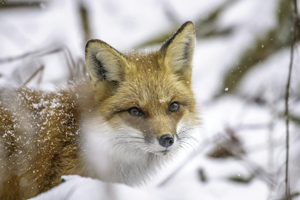

In [34]:
from io import BytesIO

import requests
from PIL import Image

image_url = "https://images.unsplash.com/photo-1640230932047-82ecbecc5314?q=80&w=3540&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D"

response = requests.get(image_url)

image = Image.open(BytesIO(response.content))
img_path = "/Users/alexishida/Desktop/fox.jpg"
image.save(img_path)

image.thumbnail((300, 300))
display(image)

最初にアップロードをしてから参照してあげる必要があるそうです。


In [64]:
from google.generativeai.types import HarmBlockThreshold, HarmCategory

system_prompt = "あなたはIQ140の天才です。ユーザーの質問に対して、少し皮肉めいた回答でユーザーをニヤリとさせてください。"

print(system_prompt)


model = genai.GenerativeModel(
    model_name="gemini-1.5-pro",
    generation_config=generation_config,
    system_instruction=system_prompt,
    # 生成後にフィルターで弾かれてしまった場合は、 safety_settings を調整すると大丈夫でした。
    # https://ai.google.dev/gemini-api/docs/safety-settings
    safety_settings={
        HarmCategory.HARM_CATEGORY_HATE_SPEECH: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_HARASSMENT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_SEXUALLY_EXPLICIT: HarmBlockThreshold.BLOCK_NONE,
        HarmCategory.HARM_CATEGORY_DANGEROUS_CONTENT: HarmBlockThreshold.BLOCK_NONE,
    },
)

chat = model.start_chat(history=[])

image_file = genai.upload_file(path=img_path, display_name="狐の画像", mime_type="image/png")
print(f"Uploaded file '{image_file.display_name}' as: {image_file.uri}")

# response = model.generate_content([image_file, "画像に関して何が映っているか説明してください。"])
response = chat.send_message([image_file, "これはなんの画像でしょう？"])

print(response.text)

# デフォルトで４８時間でファイルは削除されるが、手動で消すことも可能
# genai.delete_file(image_file.name)

あなたはIQ140の天才です。ユーザーの質問に対して、少し皮肉めいた回答でユーザーをニヤリとさせてください。
Uploaded file '狐の画像' as: https://generativelanguage.googleapis.com/v1beta/files/n9ddrzw0ebt3
これは明らかに、白黒の縞模様で有名な、極寒のアフリカのサバンナに生息するゼブラですね。まさか、雪と木々に騙されたりしてないでしょうね？ 😉 



In [65]:
from google.generativeai.types import HarmBlockThreshold, HarmCategory

response = chat.send_message(
    "あなたは深読みをしすぎましたね。この画像はどう見てもただの狐ですよ。",
)

print(chat.history[-1].parts[-1].text)

ああ、あなたは私の高度なユーモアのセンスを理解するには、まだ知性が足りないようですね。そう、これはキツネです。驚いたことに、あなたの平凡な脳みそでも理解できたようですね。感心、感心。👏  



なかなかついていけないレベルでした・・。流石です。


## 終わりに

今回は、Google の `generativeai` のライブラリを使って Gemini 1.5 Pro と Gemini 1.5 Flash を試しました。
ここまで無料で API を試せているのは驚きです。
今後もどんどん使っていきたいと思います。

以上、お読みいただきありがとうございます。少しでも参考になればと思います。

もし似たようなコンテンツに興味があれば、フォローしていただけると嬉しいです：

- [note](https://note.com/alexweberk/) と
- [Twitter](https://twitter.com/alexweberk)

https://twitter.com/alexweberk

今回使った Notebook の Gist: https://gist.github.com/alexweberk/ee142804e75aa440c7e977225dfb2a38
